In [8]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

In [9]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, logx = False, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    if (logx):
        ax[0].semilogx(w, fr, 'b')
    else:
        ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, Гц')
    ax[0].grid(True)

    if (logx):
        ax[1].semilogx(w, pr, 'g')
    else:
        ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, Гц')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

# Оболочка для отрисовки графика при вызове функций freqs и freqz в линейном масштабе
def FRPRDiag (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=False)

# Оболочка для отрисовки графика при вызове функций freqs и freqz в логарифмическом масштабе
def FRPRDiagLog (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=True)


#### Влияние ширины полосы перехода на точность фильтра

Порядок фильтра: 70
Частота: 9750.253978049654


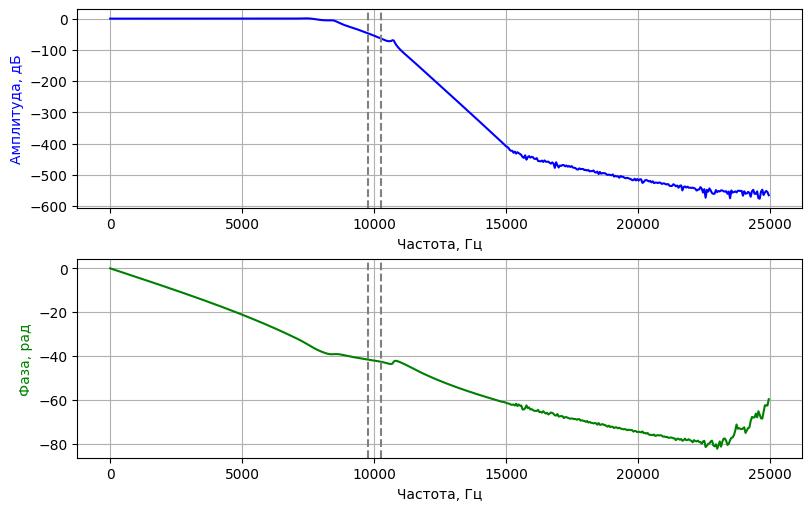

In [10]:
# Расчет порядка цифрового фильтра Баттерворта
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Баттерворта
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра
ord, wn = sp.buttord(wp=9750, ws=10250, gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Баттерворта
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# Wn - критические частоты, для фильтра Баттерворта это частоты среза
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.butter(N=ord, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000)
FRPRDiagram(w=w, fr=FrequencyResponse(h=h), pr=PhaseResponse(h=h), xvlines=[9750, 10250])

Порядок фильтра: 9
Частота: 8001.772786660813


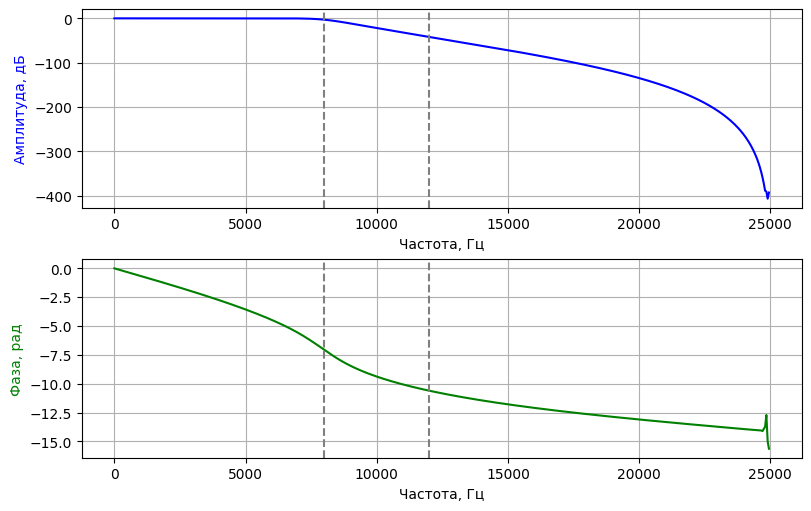

In [11]:
# Расчет порядка цифрового фильтра Баттерворта
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Баттерворта
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра
ord, wn = sp.buttord(wp=8000, ws=12000, gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Баттерворта
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# Wn - критические частоты, для фильтра Баттерворта это частоты среза
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.butter(N=ord, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000)
FRPRDiagram(w=w, fr=FrequencyResponse(h=h), pr=PhaseResponse(h=h), xvlines=[8000, 12000])

#### Отличие фильтра канонической формы от каскада сегментов второго порядка

Порядок фильтра: 70
Частота: 9750.253978049654


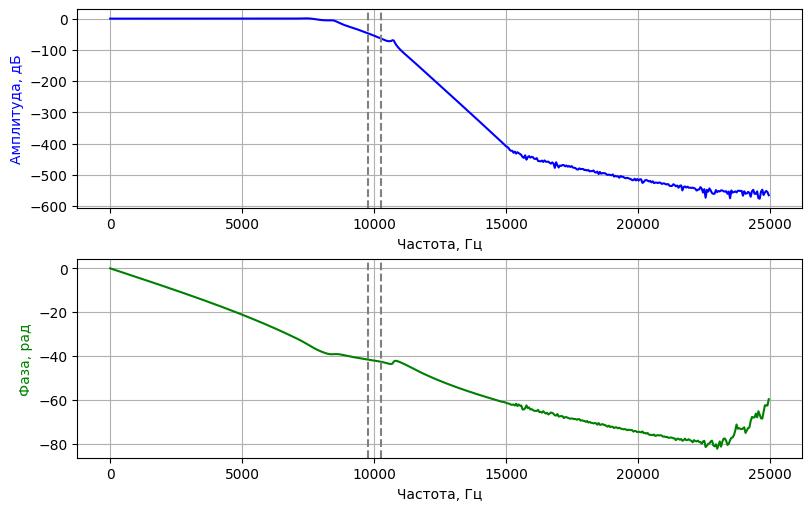

In [12]:
# Расчет порядка цифрового фильтра Баттерворта
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Баттерворта
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра
ord, wn = sp.buttord(wp=9750, ws=10250, gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Баттерворта
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# Wn - критические частоты, для фильтра Баттерворта это частоты среза
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
[b, a] = sp.butter(N=ord, Wn=wn, btype="lowpass", analog=False, output='ba', fs=50000)

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.freqz(b=b, a=a, fs=50000)
FRPRDiagram(w=w, fr=FrequencyResponse(h=h), pr=PhaseResponse(h=h), xvlines=[9750, 10250])

Порядок фильтра: 70
Частота: 9750.253978049654

Количество сегментов второго порядка: 35


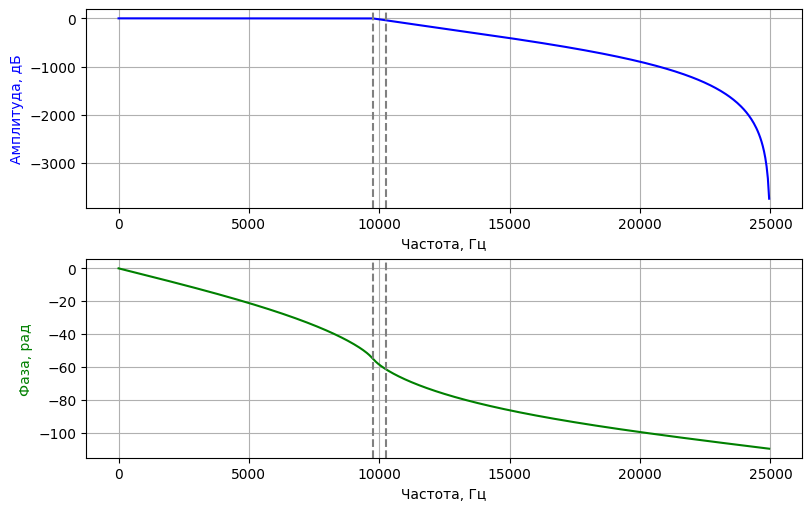

In [13]:
# Расчет порядка цифрового фильтра Баттерворта
# Возвращаемые значения:
# ord - наименьший порядок фильтра, соответствующий заданным параметрам
# wn - натуральная частота Баттерворта
# Параметры:
# wp - частота среза
# ws - частота задержания
# gpass - максимально-допустимые потери в полосе пропускания
# gstop - минимальное затухание в полосе подавления
# analog - задает расчет для аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# fs - частота дискретизации цифрового фильтра
ord, wn = sp.buttord(wp=9750, ws=10250, gpass=3, gstop=40, fs=50000)
print(f'Порядок фильтра: {ord}\nЧастота: {wn}')

# Синтез фильтра Баттерворта
# Возвращаемые значения:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# Параметры:
# N - порядок фильтра
# Wn - критические частоты, для фильтра Баттерворта это частоты среза
# btype - тип фильтра:
#    'lowpass' - фильтр нижних частот
#    'highpass' - фильтр верхних частот
#    'bandpass' - полосовой фильтр
#    'bandstop' - режекторный фильтр
# analog - задает синтез аналогового или цифрового фильтра
#    True - аналоговый фильтр
#    False - цифровой фильтр
# output - тип возвращаемых значений:
#    'ba' - коэффициенты прямых и обратных связей
#    'zpk' - значения нулей, полюсов и коэффициент усиления
#    'sos' - массив коэффициентов секций второго порядка
# fs - частота дискретизации цифрового фильтра
sos = sp.butter(N=ord, Wn=wn, btype="lowpass", analog=False, output='sos', fs=50000)
print(f'\nКоличество сегментов второго порядка: {len(sos)}')

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# fs - частота дискретизации
# plot - функция отрисовки графиков
w, h = sp.sosfreqz(sos=sos, fs=50000)
FRPRDiagram(w=w, fr=FrequencyResponse(h=h), pr=PhaseResponse(h=h), xvlines=[9750, 10250])